In [ ]:
 library(dplyr)
if (!require(forecast)) install.packages("forecast")
if (!require(forecast)) install.packages("uroot")
library(stats)
library(repr)
library(tseries)
library(readr)
library(forecast)
#library(uroot)
library(urca)





In [1]:
install.packages("aTSA")
library(aTSA)

package 'aTSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\adamp\AppData\Local\Temp\RtmpUX2pRW\downloaded_packages



Attaching package: 'aTSA'

The following object is masked from 'package:graphics':

    identify



### Phillips-Perron test
The Philips-Perron test is an alternative to DF test, ADF test in particular. It accounts for the possibility, that the $y_{t-1}$ is not exogenous, and while ADF does that by including further variables (difference lags). However, this requires non-autocorrelation of errors and homoscedasticity just like any other time series regression.  The PP test aims to account for that using a non-parametric approach accounting for $y_{t-1}$ endogoneity, hence it is a hgeneralization. It requires only mild assumptions allowing both autocorrelation and heteroskedasticity. In exchange we obviously loose efficiency. Davidson, 2004 has shown, that in finite samples PP test does not perform better than the ADF test. 

[1] "Number of obserbvations is: 146"

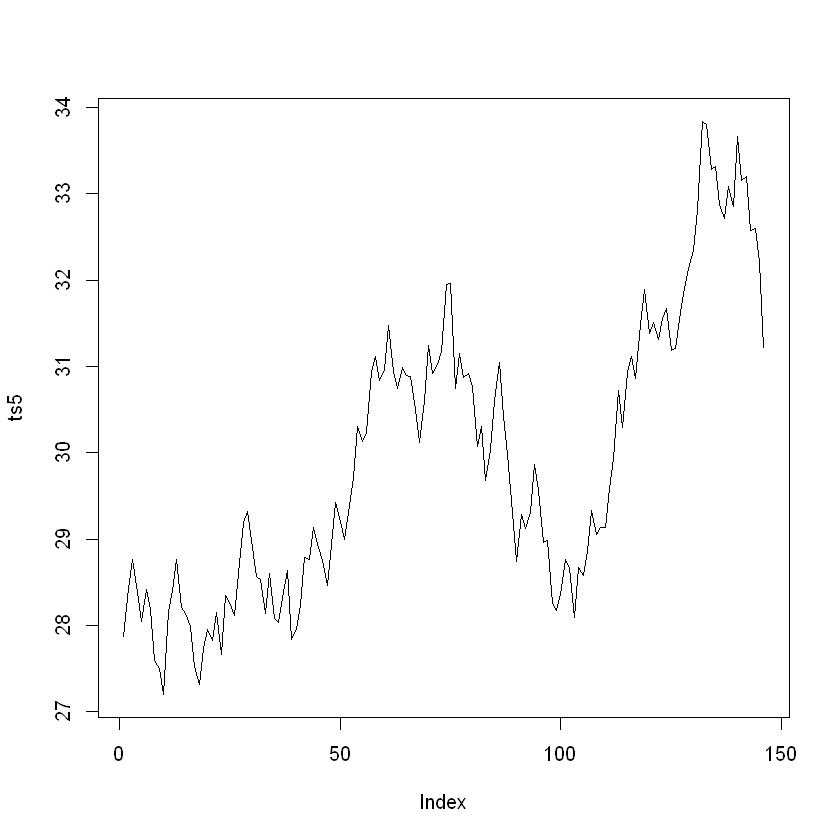

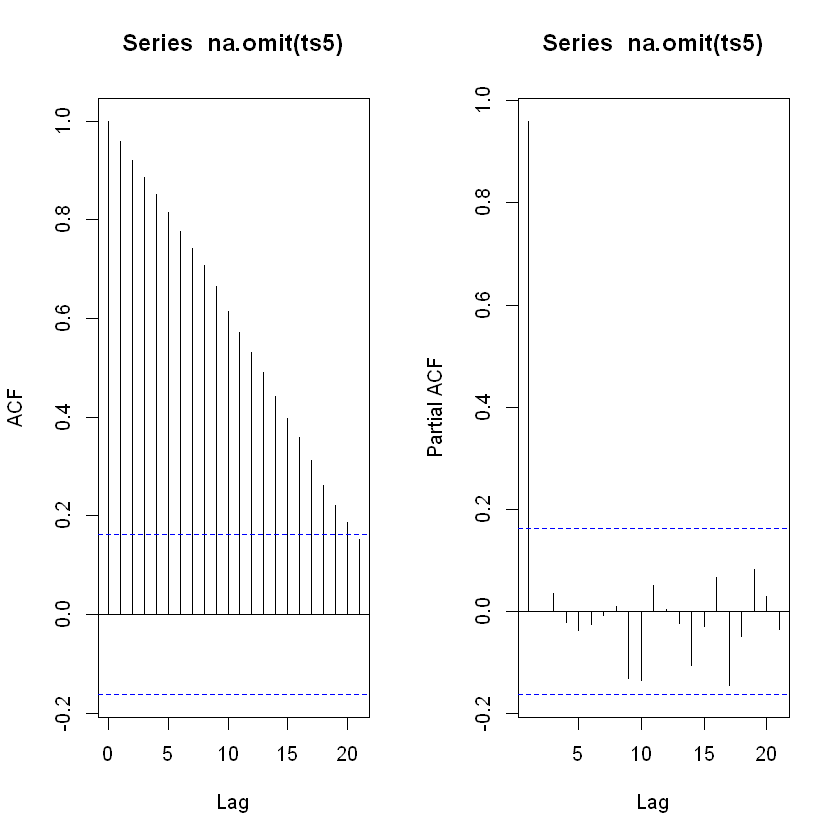

In [19]:
MPLX5 <- read.csv("C:/Users/adamp/Downloads/MPLX (1).csv")
ts5<-MPLX5$Close[2200:2345]
paste("Number of obserbvations is:" , length(ts5))
plot(ts5, type = "l")
par(mfrow = c(1, 2))
acf(na.omit(ts5))
pacf(na.omit(ts5))

We chose a shorter period here to be able to see the difference between the test using trend and not using the trend. The trend is clearly visible in the data and should be reflected by the test.

As mentioned before, the  Phillips-Perron test makes correction to the test statistics and is robust to the unspecified autocorrelation and heteroscedasticity in the errors. 

There are two types of test statistics, $Z_{\rho}$ and $Z_{\tau}$, which have the same asymptotic distributions as ADF test statistic.
The setting lag.short = TRUE deals with number of lags.  We either use the default number of Newey-West lags $floor(4*(length(x)/100)^{0.25})$, or $floor(12*(length(x)/100)^{0.25})$. 

There are three types of models just like in the DF test.  The first type (type1) is: $$x[t] = \rho*x[t-1] + e[t],$$.  The second type (type2) is: $$x[t] = \mu + \rho*x[t-1] + e[t].$$ The third type (type3) is: $$x[t] = \mu + \alpha*t + \rho*x[t-1] + e[t].$$ 


In [26]:

pp.test(ts5, type = c("Z_rho"), lag.short = TRUE, output = TRUE)


Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag  Z_rho p.value
   4 0.0979   0.711
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -4.9   0.466
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4   -11   0.407
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 


We apparently get a unit root process confirmation, we failed to reject the null hypothesis, which is non-stationarity in this test. Importantly, p-values for test versions with trend and drift are lower, which indicated there is indeed some trend, and that by including it we remove part of the autocorrelation. We will try to test data after FD.  

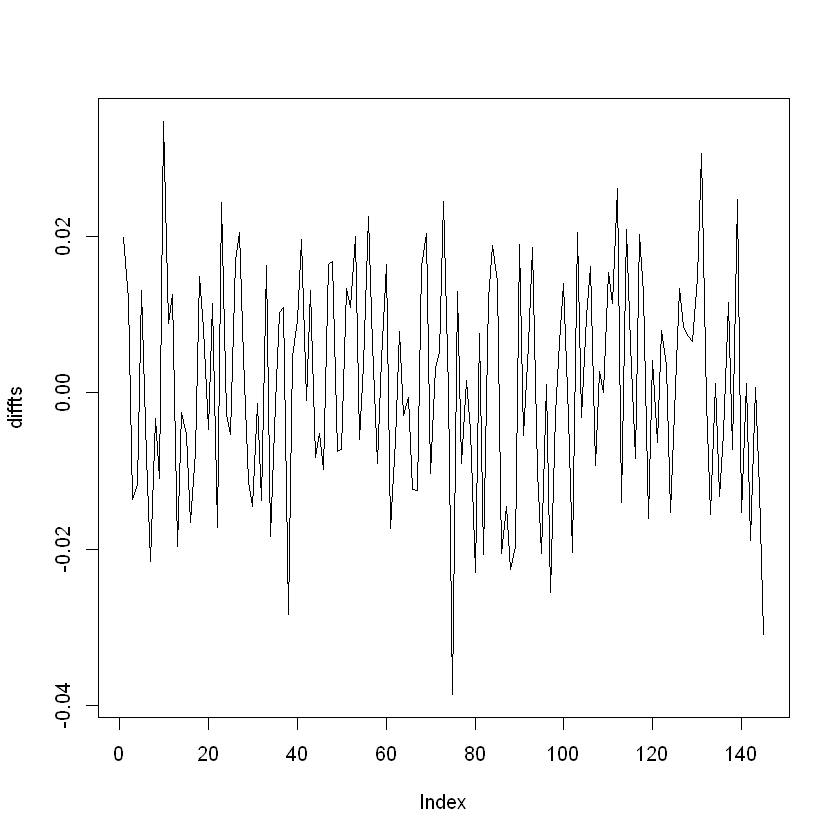

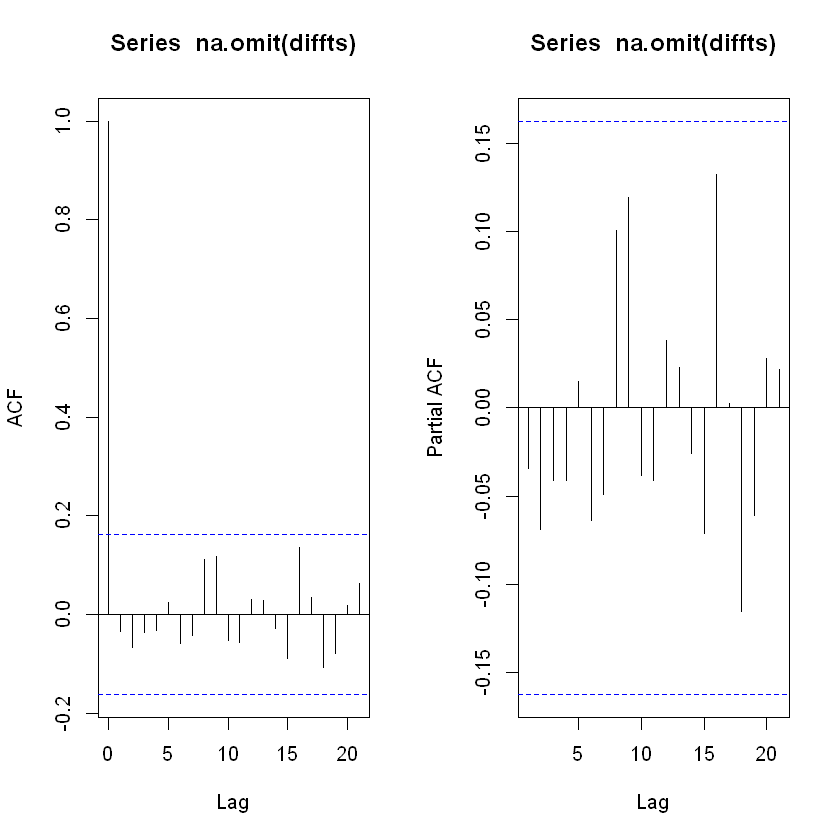

In [25]:
diffts<-diff(log(ts5))
plot(diffts, type = "l")
par(mfrow = c(1, 2))
acf(na.omit(diffts))
pacf(na.omit(diffts))

This data looks way more stationary, than before, let's see wht the test results are. 

In [28]:
pp.test(diffts, type = c("Z_rho"), lag.short = TRUE, output = TRUE)


Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4  -139    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -139    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4  -139    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 


Just as expected, we can see first differencing removed the unit root process, which has been confirmed by all of the tests. We can not see different Z_rho statistics values since they are all too high to display.

### Structural chenges in data


In [32]:
install.packages("strucchange")
library(strucchange)


also installing the dependency 'sandwich'




  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE

package 'strucchange' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\adamp\AppData\Local\Temp\RtmpUX2pRW\downloaded_packages


installing the source package 'sandwich'

Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich


[1] "a is -6.26453810742332"

[1] "d is 0.421158731442352"

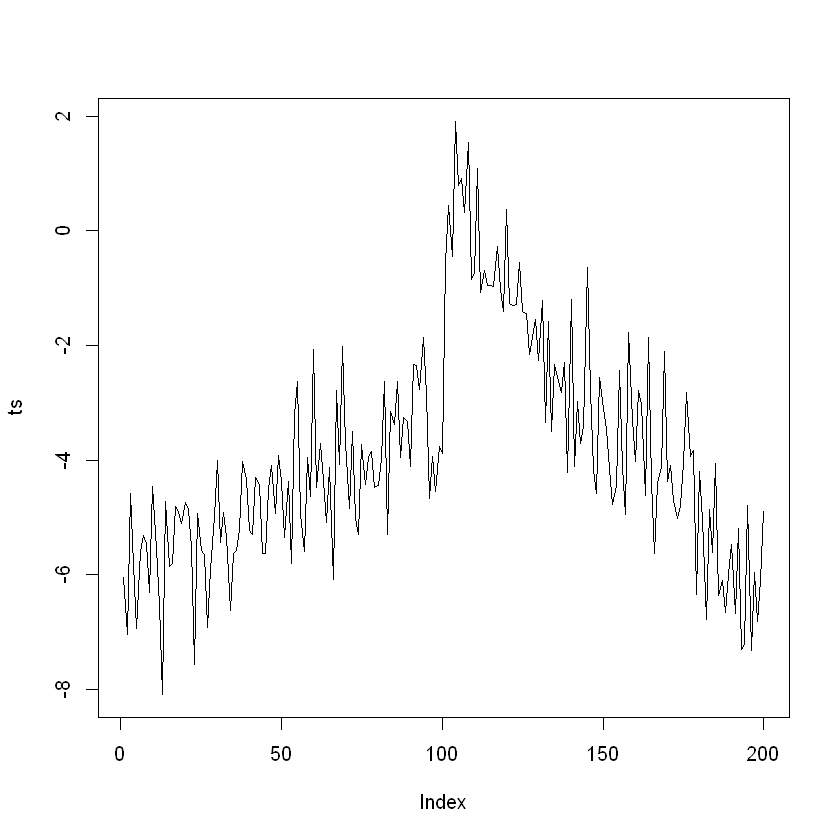

In [46]:
set.seed(1)
a<-rnorm(1,0, 10)
paste("a is", a)
b<-0.03
x<-c(1:100)
c<-rnorm(100, 0,1)
data1<-a+b*x+c

d<-rnorm(1,0, 10)
paste("d is", d)

e<- -0.07
y<-c(1:100)
f<-rnorm(100, 0,1)
data2<-d+e*y+f

ts<-c(data1,data2)
plot(ts, type = "l")